# Electrical Fault detection and Classification using ANN models

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Clone the repository
!git clone https://github.com/Shahin-96/Fault-Detection-and-Classification.git/

Cloning into 'Fault-Detection-and-Classification'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 1.36 MiB | 13.26 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [3]:
#Importing the data
path_detection_dataset= "/content/Fault-Detection-and-Classification/Fault_Detection_Dataset.xlsx"
path_class_dataset= "/content/Fault-Detection-and-Classification/Fault_Classification_Dataset.csv"
detection_train = pd.read_excel(path_detection_dataset).dropna(axis=1)
class_train = pd.read_csv(path_class_dataset).dropna(axis=1)

features=['Ia','Ib','Ic','Va','Vb','Vc']
class_target = ['G','C','B','A']

In [4]:
#Defining the inputs and outputs
detection_data_X = detection_train[features]
detection_data_Y = detection_train['Output (S)']
class_data_X = class_train[features]
class_data_Y = class_train[class_target]

#Defining accuracy and error vectors
detect_accuracy = list()
detect_error = list()
class_accuracy = list()
class_error = list()

### Class Distribution

Output (S)
0    0.542038
1    0.457962
Name: proportion, dtype: float64


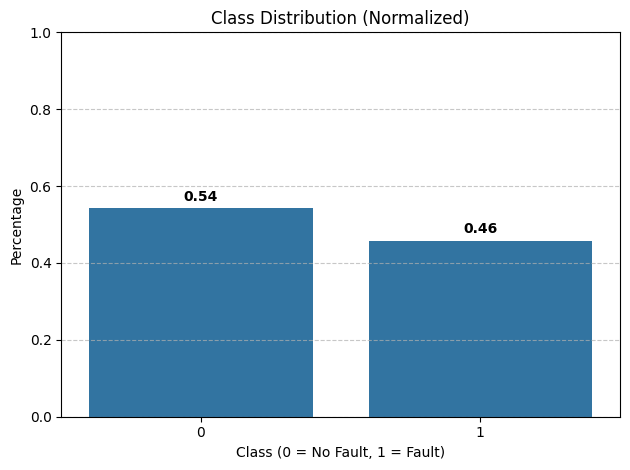

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

print(detection_data_Y.value_counts(normalize=True))  # Shows percentages

class_counts = detection_data_Y.value_counts(normalize=True).reset_index()
class_counts.columns = ['Class', 'Percentage']

ax=sns.barplot(x='Class', y='Percentage', data=class_counts)

plt.title("Class Distribution (Normalized)")
plt.xlabel("Class (0 = No Fault, 1 = Fault)")
plt.ylabel("Percentage")
plt.ylim(0, 1)

# Add text labels on top of bars
for index, row in class_counts.iterrows():
    ax.text(index, row['Percentage'] + 0.02, f"{row['Percentage']:.2f}",
            color='black', ha="center", fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Spliting the Data

In [6]:
#Splitting the data
class_train_X,class_test_X,class_train_Y,class_test_Y= train_test_split(class_data_X,class_data_Y,test_size=0.33,random_state=1)
detection_train_X,detection_test_X,detection_train_Y,detection_test_Y = train_test_split(detection_data_X,detection_data_Y,test_size=0.33,random_state=1)

### Choose The best Alpha

In [7]:
# Choosing the best Alpha
from sklearn.linear_model import LassoCV

# Automatically tests multiple alpha values using cross-validation
alpha=[0.01, 0.1, 1.0, 2.0, 10.0]

mse = []
for i in alpha:
  detection_model = linear_model.Lasso(alpha = i)
  detection_model.fit(detection_train_X, detection_train_Y)
  #Predicting test values and printing out Mean Squared Error
  detection_preds = detection_model.predict(detection_test_X)
  mse.append(mean_squared_error(detection_test_Y,detection_preds))

# Find the best alpha (i.e., the one with the lowest MSE)
best_index = mse.index(min(mse))
best_alpha = alpha[best_index]

print("The Error of our Detection Model is: ", mse)
print("The Best Alpha is:", best_alpha)

The Error of our Detection Model is:  [0.24402207457117056, 0.2440051967942166, 0.24386297058535436, 0.24375743622444437, 0.24451545559116683]
The Best Alpha is: 2.0


# Linear regression

In [8]:
#Defining different Models for different classification problems
detection_model = linear_model.Lasso(alpha = 2.0)
class_model = LinearRegression()

In [9]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']*2+class_train_Y['B']*3+class_train_Y['C']*4])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearRegression()

### Results

In [10]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*4])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.24375743622444437
The Error of our Classification Model is:  14.027182890146198


In [11]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.017945755271112085
The accuracy score of our Classification Model is:  0.03240714740551487


### Graphs

In [12]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [13]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# Logistic regression

In [14]:
#Defining different Models for different classification problems
detection_model = LogisticRegression()
class_model = LogisticRegression()

In [15]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1 + class_train_Y['A']*2 + class_train_Y['B']*3 + class_train_Y['C']*4])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Results

In [16]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*4])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.26155011360767483
The Error of our Classification Model is:  37.83044315992293


In [17]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.7384498863923251
The accuracy score of our Classification Model is:  0.315606936416185


### Graphs

In [18]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [19]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# Polynomial Regression

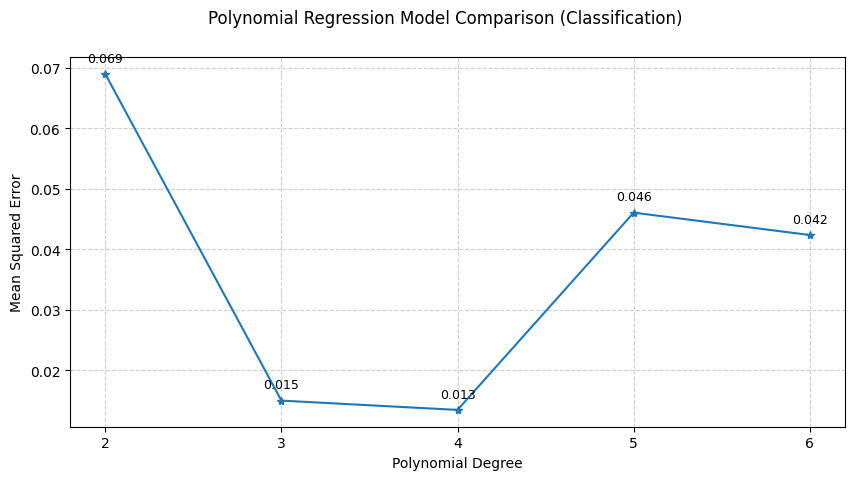

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Initialize list for errors and degrees
errors = []
degrees = list(range(2, 7))  # degrees: 2, 3, 4, 5, 6

# Step 2: Fit polynomial regression models for each degree
for i in degrees:
    poly = PolynomialFeatures(i)
    model = LinearRegression()
    model.fit(poly.fit_transform(class_train_X), class_train_Y)
    preds = model.predict(poly.fit_transform(class_test_X))
    errors.append(mean_squared_error(class_test_Y, preds))

# Step 3: Plotting
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.suptitle('Polynomial Regression Model Comparison (Classification)')

# Plot with degrees as X-axis
ax.plot(degrees, errors, marker='*', linestyle='-')
ax.set_xticks(degrees)
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Mean Squared Error')
ax.grid(True, linestyle='--', alpha=0.6)

# Optional: annotate each point with error value
for i, error in enumerate(errors):
    ax.text(degrees[i], error + 0.002, f"{error:.3f}", ha='center', fontsize=9)

plt.show()

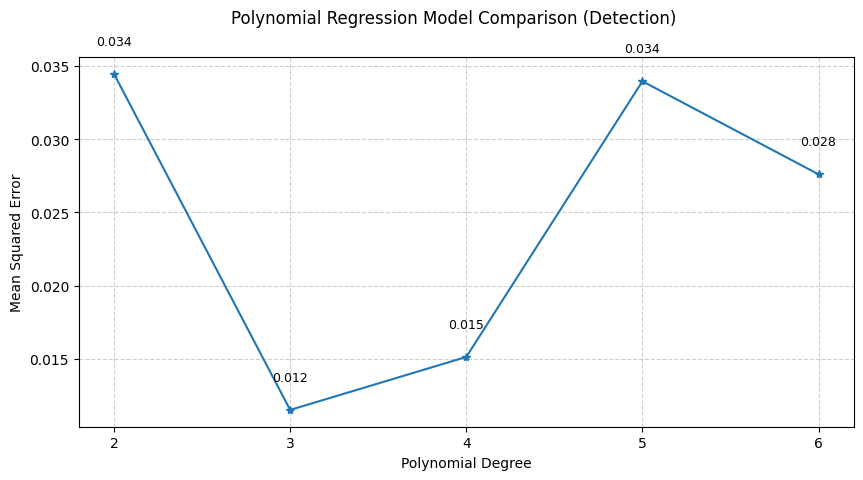

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Initialize lists
errors = []
degrees = list(range(2, 7))  # Degrees: 2 to 6

# Step 2: Loop through polynomial degrees
for i in degrees:
    poly = PolynomialFeatures(i)
    model = LinearRegression()
    model.fit(poly.fit_transform(detection_train_X), detection_train_Y)
    preds = model.predict(poly.fit_transform(detection_test_X))
    errors.append(mean_squared_error(detection_test_Y, preds))

# Step 3: Plotting the errors
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(10)
fig.suptitle('Polynomial Regression Model Comparison (Detection)')

# Use degrees as x-axis
ax.plot(degrees, errors, marker='*', linestyle='-')
ax.set_xticks(degrees)
ax.set_xlabel('Polynomial Degree')
ax.set_ylabel('Mean Squared Error')
ax.grid(True, linestyle='--', alpha=0.6)

# Annotate each point with the MSE value
for i, err in enumerate(errors):
    ax.text(degrees[i], err + 0.002, f"{err:.3f}", ha='center', fontsize=9)

plt.show()


In [22]:
#Defining different Models for different classification problems
detection_model = PolynomialFeatures(3)
class_model = PolynomialFeatures(4)
detect_linear = LinearRegression()
class_linear = LinearRegression()

In [23]:
#Fitting the data in different models
detect_linear.fit(detection_model.fit_transform(detection_train_X),detection_train_Y)
class_linear.fit(class_model.fit_transform(class_train_X),class_train_Y)

LinearRegression()

### Results

In [24]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detect_linear.predict(detection_model.fit_transform(detection_test_X))
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_preds = class_linear.predict(class_model.fit_transform(class_test_X))
print('The Error of our Classification Model is: ',mean_squared_error(class_test_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_test_Y,class_preds))

The Error of our Detection Model is:  0.011513408978505833
The Error of our Classification Model is:  0.01343789177767319


In [25]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

#Storing accuracy values
detect_accuracy.append((detect_linear.score(detection_model.fit_transform(detection_test_X),detection_test_Y)))
class_accuracy.append((class_linear.score(class_model.fit_transform(class_test_X),class_test_Y)))

The accuracy score of our Detection Model is:  0.9536145754822003
The accuracy score of our Classification Model is:  0.9451277940004476


### Graphs

In [26]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [27]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_test_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# Multi Layer Perceptron

In [28]:
#Defining different Models for different classification problems
detection_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1,max_iter = 1000)
class_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(10, 6), random_state=1,max_iter = 2500)

In [29]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_model.fit(class_train_X,class_train_Y)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 6), max_iter=2500,
              random_state=1, solver='lbfgs')

### Results

In [30]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_test_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_test_Y,class_preds))

The Error of our Detection Model is:  0.008331229487503155
The Error of our Classification Model is:  0.03188824662813102


In [31]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_test_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_test_Y)))

The accuracy score of our Detection Model is:  0.9916687705124968
The accuracy score of our Classification Model is:  0.8828516377649326


### Graphs

In [32]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [33]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_test_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# Naive Bayes

In [34]:
#Defining different Models for different classification problems
detection_model = GaussianNB()
class_model = GaussianNB()

In [35]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

GaussianNB()

### Results

In [36]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.019439535470840697
The Error of our Classification Model is:  2.1078998073217727


In [37]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9805604645291593
The accuracy score of our Classification Model is:  0.796917148362235


### Graphs

In [38]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [39]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# Decision Tree Classifier

In [40]:
#Defining different Models for different classification problems
detection_model = DecisionTreeClassifier()
class_model = DecisionTreeClassifier()

In [41]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

DecisionTreeClassifier()

### Results

In [42]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.005806614491290078
The Error of our Classification Model is:  0.30096339113680154


In [43]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.99419338550871
The accuracy score of our Classification Model is:  0.8666666666666667


### Graphs

In [44]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [45]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# SVM

In [46]:
#Defining different Models for different classification problems
detection_model = SVC()
class_model = LinearSVC()

In [47]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

LinearSVC()

### Results

In [48]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.01792476647311285
The Error of our Classification Model is:  41.223121387283236


In [49]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9820752335268872
The accuracy score of our Classification Model is:  0.31676300578034683


### Graphs

In [50]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [51]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

# KNN

In [52]:
#Defining different Models for different classification problems
detection_model = KNeighborsClassifier(n_neighbors=2)
class_model = KNeighborsClassifier(n_neighbors=6)

In [53]:
#Fitting the data in different models
detection_model.fit(detection_train_X,detection_train_Y)
class_Y = np.array([class_train_Y['G']*1+class_train_Y['A']
                    *2+class_train_Y['B']*3+class_train_Y['C']*5])
class_Y= class_Y.transpose().ravel()
class_model.fit(class_train_X,class_Y)

KNeighborsClassifier(n_neighbors=6)

### Results

In [54]:
#Predicting test values and printing out Mean Squared Error
detection_preds = detection_model.predict(detection_test_X)
print('The Error of our Detection Model is: ',mean_squared_error(detection_test_Y,detection_preds))

class_Y = np.array([class_test_Y['G']*1+class_test_Y['A']*2+class_test_Y['B']*3+class_test_Y['C']*5])
class_Y = class_Y.transpose().ravel()
class_preds = class_model.predict(class_test_X)
print('The Error of our Classification Model is: ',mean_squared_error(class_Y,class_preds))

#storing error values
detect_error.append(mean_squared_error(detection_test_Y,detection_preds))
class_error.append(mean_squared_error(class_Y,class_preds))

The Error of our Detection Model is:  0.007573844988639233
The Error of our Classification Model is:  0.9845857418111753


In [55]:
# Printing out accuracy scores of our models
print('The accuracy score of our Detection Model is: ',(detection_model.score(detection_test_X,detection_test_Y)))
print('The accuracy score of our Classification Model is: ',(class_model.score(class_test_X,class_Y)))

#Storing accuracy values
detect_accuracy.append((detection_model.score(detection_test_X,detection_test_Y)))
class_accuracy.append((class_model.score(class_test_X,class_Y)))

The accuracy score of our Detection Model is:  0.9924261550113608
The accuracy score of our Classification Model is:  0.8246628131021194


### Graphs

In [56]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Detection Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(detection_test_X, detection_test_Y,'o')
# axs[1].plot(detection_test_X, detection_preds,'o')

In [57]:
# fig, axs = plt.subplots(1,2)
# fig.set_figwidth(16)
# fig.suptitle('Classification Results')
# axs[0].set_title('Input')
# axs[1].set_title('Predicted')
# axs[0].plot(class_test_X, class_Y,'o')
# axs[1].plot(class_test_X, class_preds,'o')

In [58]:
print(detect_accuracy)
print(detect_error)
print(class_accuracy)
print(class_error)

[0.017945755271112085, 0.7384498863923251, 0.9536145754822003, 0.9916687705124968, 0.9805604645291593, 0.99419338550871, 0.9820752335268872, 0.9924261550113608]
[0.24375743622444437, 0.26155011360767483, 0.011513408978505833, 0.008331229487503155, 0.019439535470840697, 0.005806614491290078, 0.01792476647311285, 0.007573844988639233]
[0.03240714740551487, 0.315606936416185, 0.9451277940004476, 0.8828516377649326, 0.796917148362235, 0.8666666666666667, 0.31676300578034683, 0.8246628131021194]
[14.027182890146198, 37.83044315992293, 0.01343789177767319, 0.03188824662813102, 2.1078998073217727, 0.30096339113680154, 41.223121387283236, 0.9845857418111753]


# Model selection

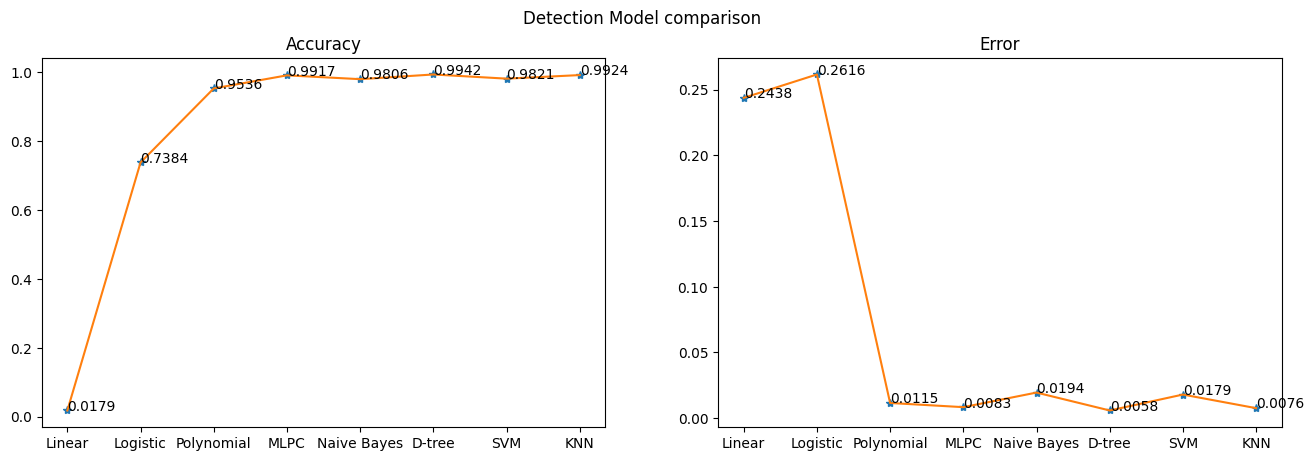

In [59]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Model comparison')
x = list(range(8))

ax[0].set_xticks(x)
ax[0].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[0].set_title('Accuracy')
ax[0].plot(detect_accuracy,'*')
ax[0].plot(detect_accuracy)
for i in range(len(detect_accuracy)):
    detect_accuracy[i] = round(detect_accuracy[i],4)
for i,j in zip(x,detect_accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks(x)
ax[1].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[1].set_title('Error')
ax[1].plot(detect_error,'*')
ax[1].plot(detect_error)
for i in range(len(detect_error)):
    detect_error[i] = round(detect_error[i],4)
for i,j in zip(x,detect_error):
    ax[1].annotate(str(j),xy=(i,j))

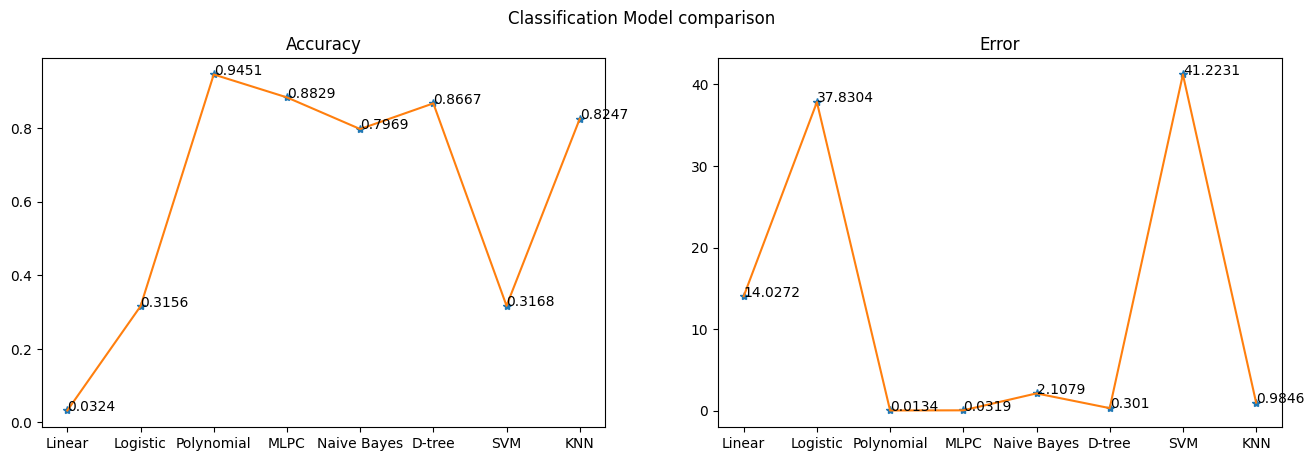

In [60]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Classification Model comparison')
x = list(range(8))

ax[0].set_xticks(x)
ax[0].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[0].set_title('Accuracy')
ax[0].plot(class_accuracy,'*')
ax[0].plot(class_accuracy)
for i in range(len(class_accuracy)):
    class_accuracy[i] = round(class_accuracy[i],4)
for i,j in zip(x,class_accuracy):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks(x)
ax[1].set_xticklabels(['Linear','Logistic','Polynomial','MLPC','Naive Bayes','D-tree','SVM','KNN'])
ax[1].set_title('Error')
ax[1].plot(class_error,'*')
ax[1].plot(class_error)
for i in range(len(class_error)):
    class_error[i] = round(class_error[i],4)
for i,j in zip(x,class_error):
    ax[1].annotate(str(j),xy=(i,j))